In [1]:
%matplotlib inline

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from icecream import ic

In [4]:
 # create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
 # reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
 # View all of the classes that automap found
 Base.classes.keys()

['measurement', 'station']

In [8]:
 # Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
 # Create our session (link) from Python to the DB
 session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()
columns1 = inspector.get_columns('measurement')
print(f'Measurement table has the following columns: ')
for c in columns1:
    print(c['name'], c['type'])
print(f'Station table has the following columns: ')
columns2 = inspector.get_columns('station')
for c in columns2:
    print(c['name'], c['type'])


Measurement table has the following columns: 
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
Station table has the following columns: 
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
 # Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'Measurement table most recent date is {[recent for recent in recent]}.')


Measurement table most recent date is ['2017-08-23'].


ic| query_date: datetime.date(2016, 8, 23)
ic| len(dates): 2230
ic| len(precip): 2230


<AxesSubplot:title={'center':"Precipitation in Hawai'i \nfrom 2016-08-24 Through 2017-08-23"}, xlabel='Date', ylabel='Precipitation'>

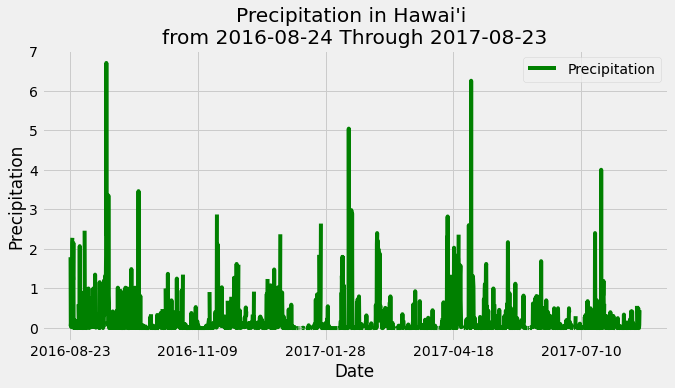

In [12]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
ic(query_date)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
# ic(results)
dates = [result[0] for result in results]
ic(len(dates))
precip = [result[1] for result in results]
ic(len(precip))
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(list(zip(dates, precip)))
precip_df.columns = ["Date", "Precipitation"]

precip_df = precip_df.set_index('Date')
# precip_df.head()

# Sort the dataframe by date
precip_sorted = precip_df.sort_values(by=["Date"])
precip_sorted.head(20)
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,5))
precip_sorted['Precipitation'].plot(ylabel="Precipitation", title="Precipitation in Hawai'i \nfrom 2016-08-24 Through 2017-08-23", color='green', legend=True)


In [13]:
precip_sorted

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [14]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
 precip_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
precip_sorted.agg(
    {
        "Precipitation": ["min", "max", "median", "mean", "std", "var"]
})

,Precipitation
min,0.000000
max,6.700000
median,0.020000
mean,0.177279
std,0.461190
var,0.212696


In [16]:
 # Design a query to calculate the total number stations in the dataset
stations_results = session.query(func.count(Station.name)).all()
station_number = [result[0] for result in stations_results]
# ic(stations_results)
print(f'The number of stations in the dataset is {station_number[0]}.')

The number of stations in the dataset is 9.


In [17]:
stations_names = session.query(Station.station, Station.name).all()
ic(stations_names)

ic| stations_names: [('USC00519397', 'WAIKIKI 717.2, HI US'),
                     ('USC00513117', 'KANEOHE 838.1, HI US'),
                     ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
                     ('USC00517948', 'PEARL CITY, HI US'),
                     ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
                     ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
                     ('USC00519281', 'WAIHEE 837.5, HI US'),
                     ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
                     ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]


[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [18]:
 # Design a query to find the most active stations (i.e. what stations have the most rows?)
# results = session.query(func.count(Measurement.station), Measurement.prcp).\
#     group_by(Measurement.station).all()
# ic(results)
# results = session.query(func.count(Measurement.station)).\
#     group_by(Measurement.station).all()
# ic(results)
results = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# ic(results)
stations = [result[0] for result in results]
# ic(stations)
station_counts = [result[1] for result in results]
# ic(station_counts)

stations_df = pd.DataFrame(list(zip(stations,station_counts)))
stations_df.columns = ["Station Id", "Counts"]
stations_df
active_station = stations_df['Station Id'].max()
# ic(active_station)
station_results = session.query(Station.name).\
    filter(Station.station == active_station).all()
station_name = [result[0] for result in station_results]
# ic(station_name)
print(f'The most active station is: {active_station}, {station_name[0]}.')
# List the stations and the counts in descending order.

The most active station is: USC00519523, WAIMANALO EXPERIMENTAL FARM, HI US.


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == active_station)
most_active_date = [result[1] for result in results]
most_active_temp = [result[2] for result in results]

most_active_df = pd.DataFrame(list(zip(most_active_date,most_active_temp)))
most_active_df.columns = ["Date", "Temp"]
most_active_df.agg(
    {
        "Temp": ["max", "min", "mean"]
    }
)



,Temp
max,85.000000
min,56.000000
mean,74.543649


In [20]:
 # Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= query_date, Measurement.station==active_station).all()
# most_active_date = [result[1] for result in results]
most_active_temp_year = [result[2] for result in results]
# ic(most_active_temp_year)

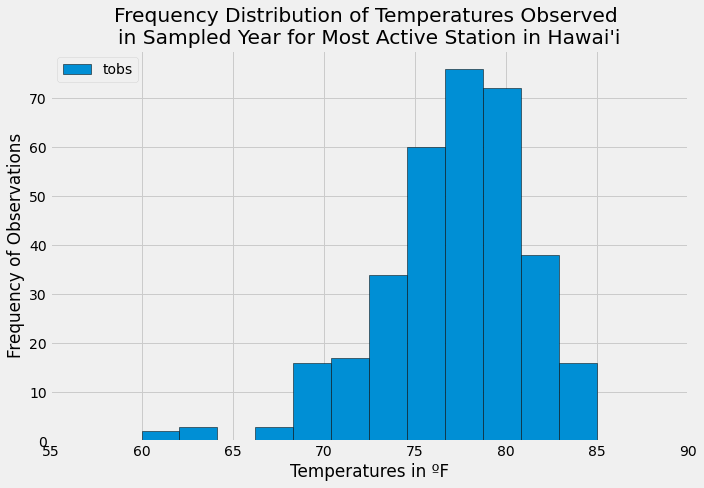

In [21]:
plt.figure(figsize=(10,7))
plt.hist(most_active_temp_year, bins=12, edgecolor='black')
plt.xlabel("Temperatures in ºF")
plt.xlim([55,90])
plt.ylabel("Frequency of Observations")
plt.legend(['tobs'], loc='upper left')
plt.title("Frequency Distribution of Temperatures Observed \nin Sampled Year for Most Active Station in Hawai'i")
plt.tight_layout()

plt.show()

In [27]:
most_active_yr = most_active_df[most_active_df['Date']>= '2016-08-23'].sort_values('Date')
ic(most_active_yr)

ic| most_active_yr:             Date  Temp
                    2332  2016-08-23  80.0
                    2333  2016-08-24  79.0
                    2334  2016-08-25  80.0
                    2335  2016-08-26  84.0
                    2336  2016-08-27  81.0
                    ...          ...   ...
                    2664  2017-08-17  83.0
                    2665  2017-08-19  85.0
                    2666  2017-08-21  82.0
                    2667  2017-08-22  82.0
                    2668  2017-08-23  82.0
                    
                    [337 rows x 2 columns]


,Date,Temp
2332,2016-08-23,80.0
2333,2016-08-24,79.0
2334,2016-08-25,80.0
2335,2016-08-26,84.0
2336,2016-08-27,81.0
...,...,...
2664,2017-08-17,83.0
2665,2017-08-19,85.0
2666,2017-08-21,82.0
2667,2017-08-22,82.0


<AxesSubplot:title={'center':"Frequency Distribution of Temperatures Observed \nin Sampled Year for Most Active Station in Hawai'i"}, ylabel='Frequency'>

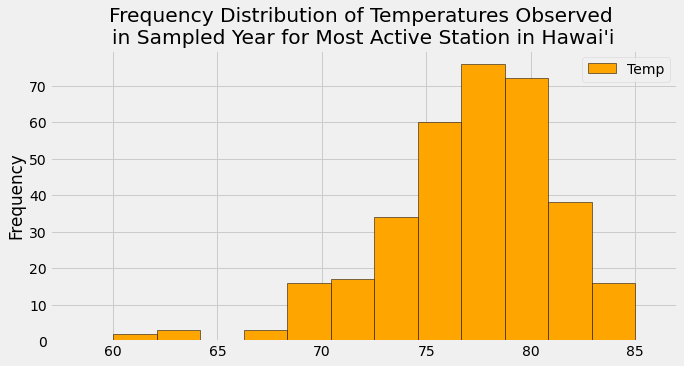

In [29]:
plt.figure(figsize=(10,5))
most_active_yr['Temp'].plot.hist(xlabel="Temperatures in ºF", bins=12, edgecolor= 'black',title="Frequency Distribution of Temperatures Observed \nin Sampled Year for Most Active Station in Hawai'i", color='orange', legend=True, xlim=[57,87])

In [23]:
 # Close Session
session.close()